# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the dataset
df = pd.read_csv('sf_ntr1.csv')

In [4]:
df.head()

,Speed,Torque,Rotor_Angle,Class
0,3038.870829,0.219250,23.504840,0
1,3038.835562,0.219563,24.004459,0
2,3038.807529,0.219294,24.519200,0
3,3038.781445,0.219069,25.010659,0
4,3038.744189,0.218781,25.522520,0


In [5]:
d1 = df.groupby('Class')

In [6]:
d1.nunique()

,Speed,Torque,Rotor_Angle,Class
Class,,,,
0,563,562,563,1
1,665,665,665,1
2,824,824,824,1
3,948,947,948,1
4,660,660,660,1
5,825,825,825,1
6,951,950,951,1
7,534,534,534,1
8,528,528,528,1


**The different faults are labelled under differet class name. We have totally 21 classes and each are classified under single and double switch open circuit faults**

# Let us see about how each independent feature is distributed
# Unipolar plot through Histogram

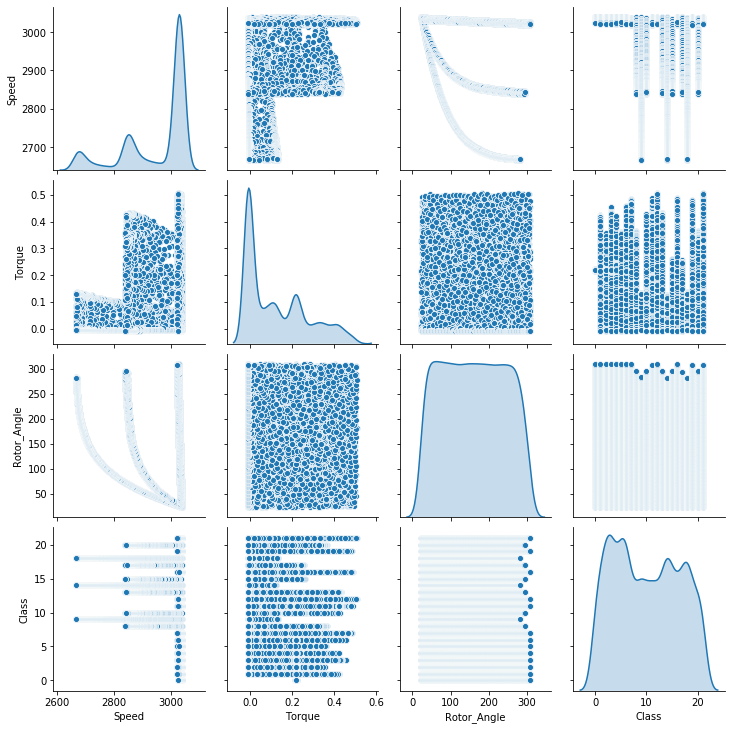

In [8]:
sns.pairplot(df,diag_kind='kde')

* **No two independent features have good linear relationship**
* **Let us see how each feature are related to each other through correlation heatmap**

In [9]:
corr = df.corr()

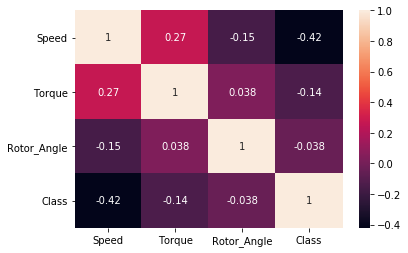

In [10]:
sns.heatmap(corr,annot=True)

**From the heatmap it is clear that no feature has great correlation with each other and no feature has greater influence with the target variable** 

In [11]:
#Splitting the train and test datasets
X = df.iloc[:,:3]

In [12]:
print(X.head())


         Speed    Torque  Rotor_Angle
0  3038.870829  0.219250    23.504840
1  3038.835562  0.219563    24.004459
2  3038.807529  0.219294    24.519200
3  3038.781445  0.219069    25.010659
4  3038.744189  0.218781    25.522520


,Class
0,0
1,0
2,0
3,0
4,0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size, random_state)

In [14]:
#The above problem is of the type mutli-class classification problem. So classification based algorithms will be used.

* **Linear regression - It will be used only when there is a linear relation between the independent and target vaiables**
* **Logistic regression - It will be used only for binary classification problems**

In [15]:
# Let us start with Naive Bayes classifier

In [1]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

ModuleNotFoundError: No module named 'sklearn'

In [17]:
y_pred = model.predict(X_test)

In [18]:
model.score(X_test,y_test)

0.17947548460661344

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.17947548460661344


In [20]:
#Support Vector Classifier

In [21]:
from sklearn import svm
clf = svm.SVC()

In [23]:
y1_pred = clf.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y1_pred))

Accuracy: 0.1427594070695553


* Ensemble Techniques

# Bagging Classifier

In [29]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=clf,n_estimators=10, random_state=0)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))

Accuracy: 0.14298745724059292


In [36]:
y3_pred = dt.predict(X_test)

In [44]:
rf.score(X_test,y_test)

0.2944127708095781

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y4_pred))

Accuracy: 0.2944127708095781


In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y5_pred))

Accuracy: 0.2919042189281642


In [51]:
# Ada_Boosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

In [54]:
y6_pred = ab.predict(X_test)

In [55]:
ab.score(X_test,y_test)

0.1007981755986317

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y6_pred))

Accuracy: 0.1007981755986317


In [57]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

In [58]:
gbht = HistGradientBoostingClassifier()

In [60]:
gbht.score(X_test,y_test)

0.31311288483466365

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)

NameError: name 'clf1' is not defined

In [64]:
eclf.score(X_test,y_test)

0.13842645381984037

# XGBoost

In [4]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [68]:
model.score(X_test,y_test)

0.26476624857468645

# Light Gradient Boosting

In [70]:
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, random_state=1)

In [72]:
model.score(X_test,y_test)

0.3087799315849487

# Cat Boost

In [75]:
model.score(X_train,y_train)

0.36897663962467014

In [76]:
model.score(X_test,y_test)

0.28232611174458383